# Credit Card Fruad Project 

In [4]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
df_raw = pd.read_csv('fraud_test.csv', encoding = 'utf-8')
df_raw.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# Based on the description of the dataset, the first column is meaningless. So, I decided to drop the first column. 

In [8]:
df = df_raw.drop('Unnamed: 0',axis=1)
df.shape

(555719, 22)

In [9]:
# Handle missing values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
df.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
# There is no null values, and the data types are all correct. 

In [13]:
df['is_fraud'].value_counts() 

is_fraud
0    553574
1      2145
Name: count, dtype: int64

### Exploring Rekationship Between Each Variable

In [15]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060
is_fraud,-0.001540,0.182267,-0.002271,0.005863,-0.000972,-0.004910,-0.013066,0.005812,-0.001060,1.000000


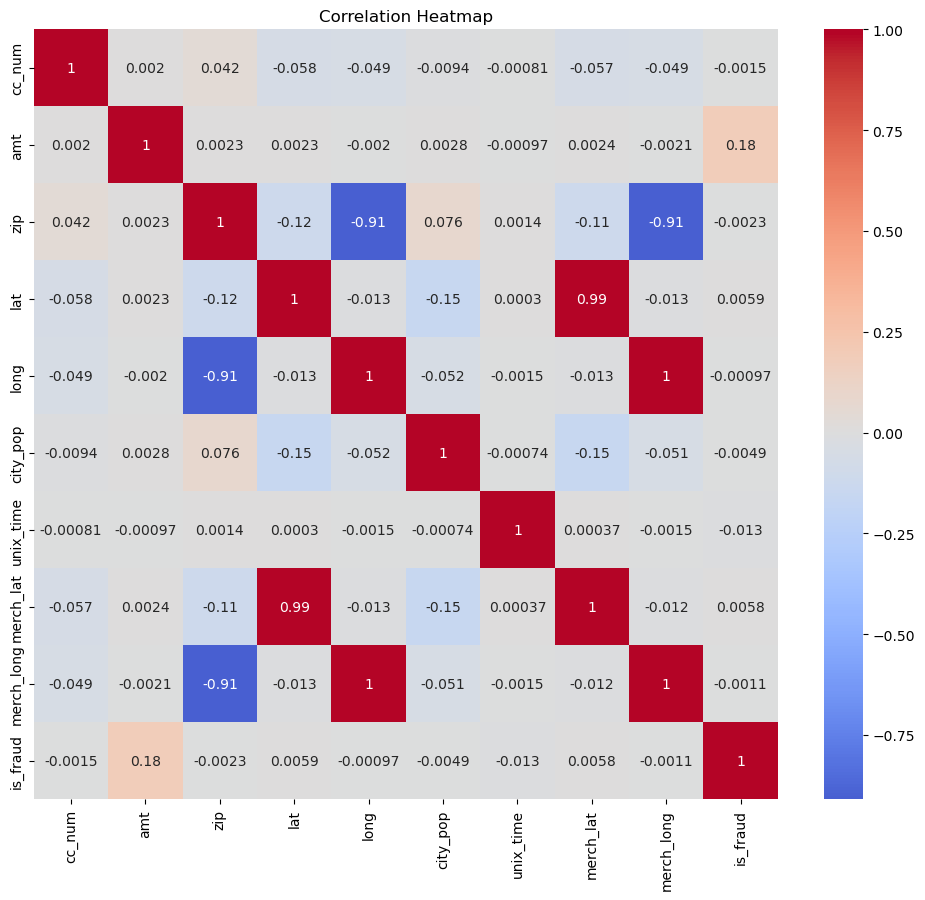

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

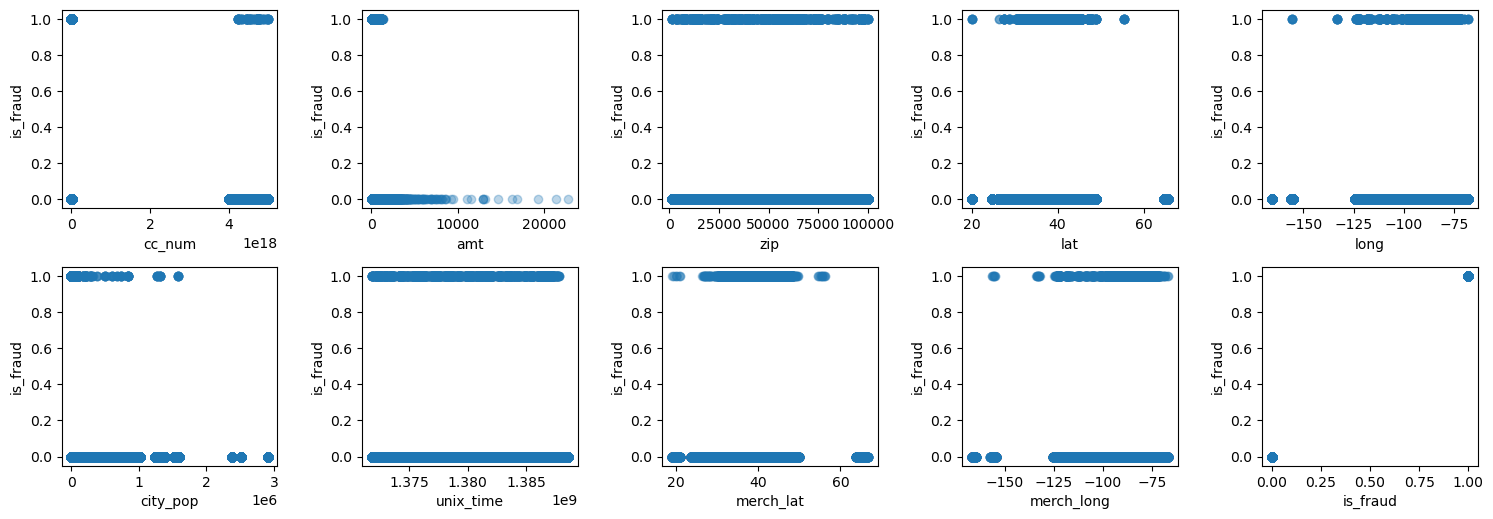

In [17]:
# Numerical columns
numerical_cols = df.select_dtypes(include=[int, float]).columns

# Scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i+1)  # Adjust the grid size based on the number of numerical features
    plt.scatter(df[col], df['is_fraud'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('is_fraud')

plt.tight_layout()
plt.show()

In [18]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [19]:
df.select_dtypes(include=[object]).columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

<Figure size 1500x600 with 0 Axes>

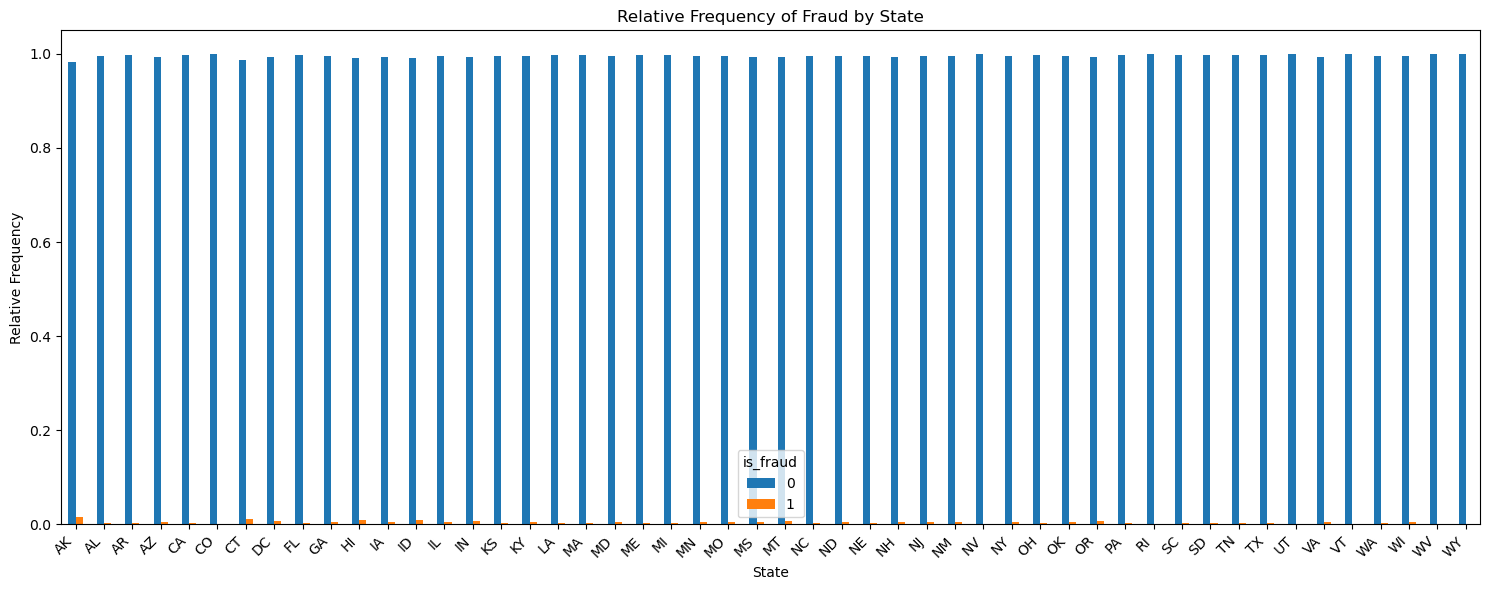

In [20]:
temp = pd.crosstab(df['state'], df['is_fraud'], normalize='index')
plt.figure(figsize=(15, 6))
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))  # Specify figure size here

# Plot bar chart
temp.plot.bar(ax=ax)

plt.ylabel('Relative Frequency')
plt.xlabel('State')
plt.title('Relative Frequency of Fraud by State')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

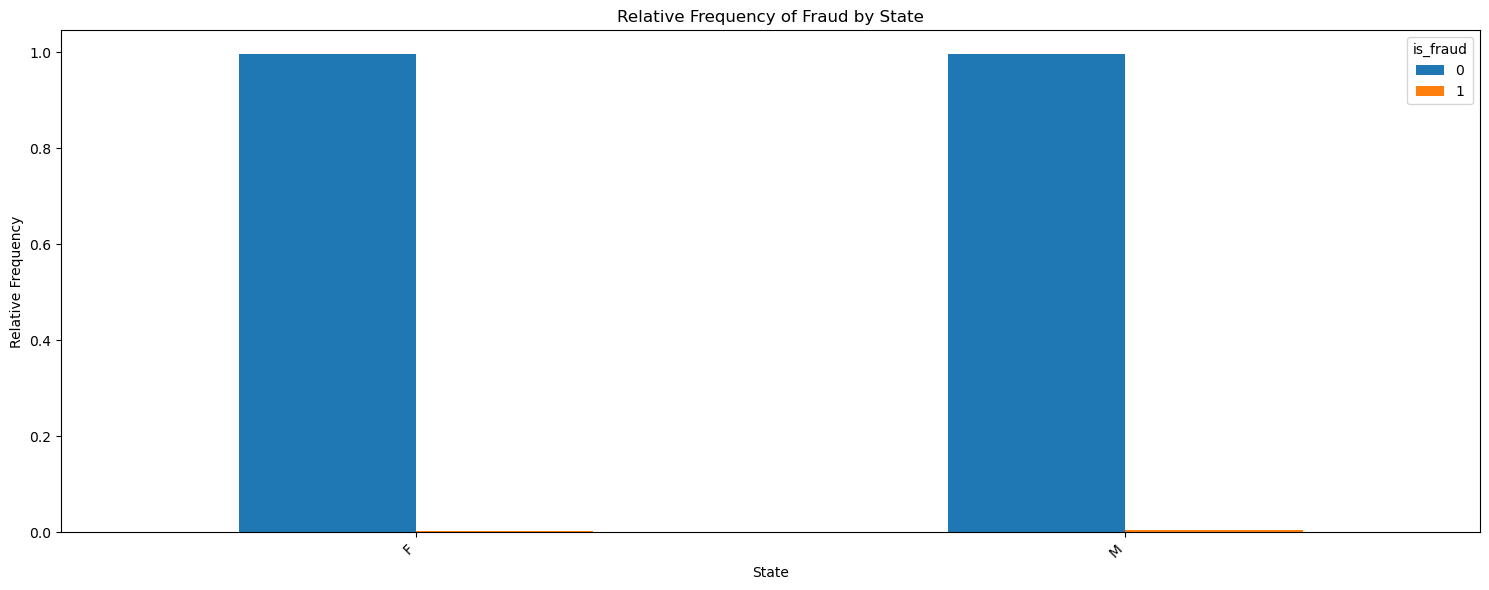

In [21]:
temp = pd.crosstab(df['gender'], df['is_fraud'], normalize='index')
plt.figure(figsize=(15, 6))
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))  # Specify figure size here

# Plot bar chart
temp.plot.bar(ax=ax)

plt.ylabel('Relative Frequency')
plt.xlabel('State')
plt.title('Relative Frequency of Fraud by State')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Prepare the features for VIF calculation
X = df[numerical_cols]  # Assuming you only use numerical features for VIF

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):\n", vif_data)


Variance Inflation Factors (VIF):
       Feature       VIF
0      cc_num  1.006900
1         amt  1.000010
2         zip  1.007533
3         lat  1.037591
4        long  5.816366
5    city_pop  1.005902
6   unix_time  0.000062
7   merch_lat  1.037189
8  merch_long  5.766118
9    is_fraud  1.000023


#### The long and merch_long variables both have moderate VIF values. This suggests they might be correlated with each other. This is expected given that long and merch_long represent longitude coordinates, which could be similar (multicollinearity). Since, long and merch_long are multicollinearity and will be eliminated, lat and merch_lat will be eliminated as well. In addtion, unix_time is not significantly correlated with other features.

In [25]:
df = df.drop(['lat', 'long', 'merch_lat', 'merch_long'],axis=1)

In [26]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,0
555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,0
555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,0
555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,0


In [27]:
categorical_cols = df.select_dtypes(include=[object]).columns

# Filter columns with more than 500 unique values
[col for col in categorical_cols if df[col].nunique() > 300]

['trans_date_trans_time',
 'merchant',
 'first',
 'last',
 'street',
 'city',
 'job',
 'dob',
 'trans_num']

In [28]:
df = df.drop(['trans_date_trans_time', 'trans_num','merchant', 'street', 'city', 'dob'],axis=1)

In [29]:
df.head(5)

,cc_num,category,amt,first,last,gender,state,zip,city_pop,job,unix_time,is_fraud
0,2.291160e+15,personal_care,2.86,Jeff,Elliott,M,SC,29209,333497,Mechanical engineer,1371816865,0
1,3.573030e+15,personal_care,29.84,Joanne,Williams,F,UT,84002,302,"Sales professional, IT",1371816873,0
2,3.598220e+15,health_fitness,41.28,Ashley,Lopez,F,NY,11710,34496,"Librarian, public",1371816893,0
3,3.591920e+15,misc_pos,60.05,Brian,Williams,M,FL,32780,54767,Set designer,1371816915,0
4,3.526830e+15,travel,3.19,Nathan,Massey,M,MI,49632,1126,Furniture designer,1371816917,0


In [34]:
# our goal is to build uo a model that trying to classify the fraud, so the name of the card holder is not important. 

In [35]:
df = df.drop(['first','last'],axis=1)
df

,cc_num,category,amt,gender,state,zip,city_pop,job,unix_time,is_fraud
0,2.291160e+15,personal_care,2.86,M,SC,29209,333497,Mechanical engineer,1371816865,0
1,3.573030e+15,personal_care,29.84,F,UT,84002,302,"Sales professional, IT",1371816873,0
2,3.598220e+15,health_fitness,41.28,F,NY,11710,34496,"Librarian, public",1371816893,0
3,3.591920e+15,misc_pos,60.05,M,FL,32780,54767,Set designer,1371816915,0
4,3.526830e+15,travel,3.19,M,MI,49632,1126,Furniture designer,1371816917,0
...,...,...,...,...,...,...,...,...,...,...
555714,3.056060e+13,health_fitness,43.77,M,MO,63453,519,Town planner,1388534347,0
555715,3.556610e+15,kids_pets,111.84,M,TX,77566,28739,Futures trader,1388534349,0
555716,6.011720e+15,kids_pets,86.88,F,WA,99323,3684,Musician,1388534355,0
555717,4.079770e+12,travel,7.99,M,ID,83643,129,Cartographer,1388534364,0


### Convert categorical variables to numerical using Label Encoding

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [45]:
label_encoders = {}
categorical_columns = ['category', 'gender', 'state', 'job']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

### Train-test split

In [47]:
# Features and target
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

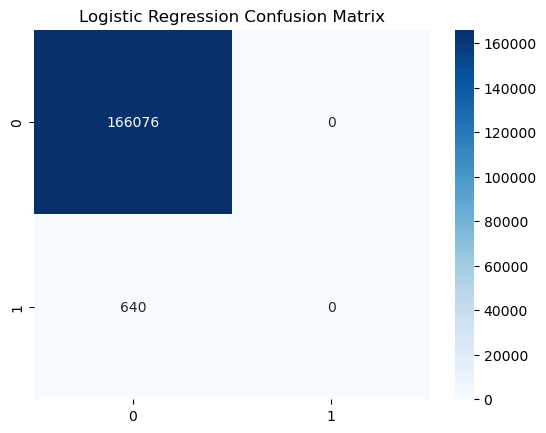


Accuracy of the Logistic Regression Model: 0.9962

Recall of the Logistic Regression Model: 0.0000


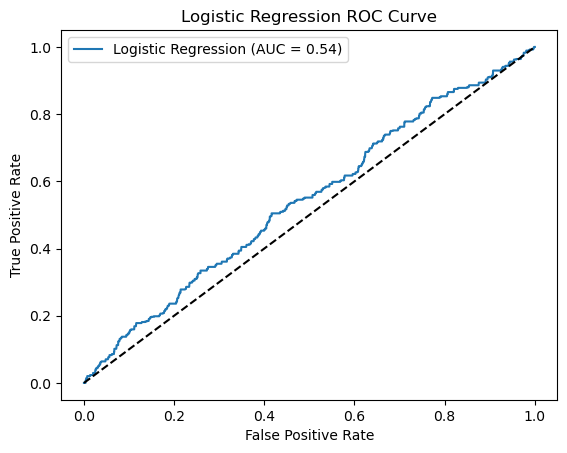

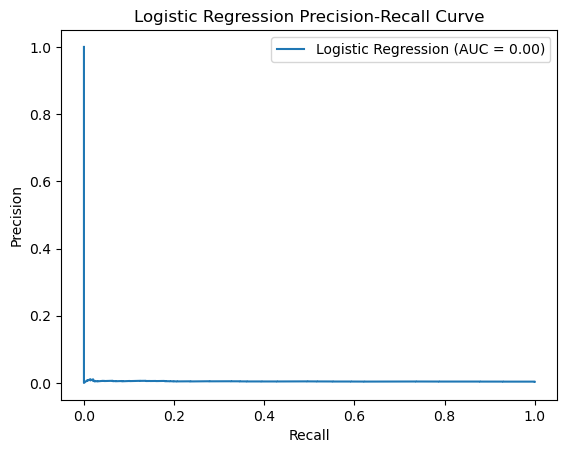

In [74]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm_lr.ravel()
# Calculating accuracy
accuracy_lr = (TP + TN) / (TP + TN + FN + FP)
print(f"\nAccuracy of the Logistic Regression Model: {accuracy_lr:.4f}")

# Calculating recall (Sensitivity or True Positive Rate)
recall_lr = (TP) / (TP + FN)
print(f"\nRecall of the Logistic Regression Model: {recall_lr:.4f}")

# ROC & AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc(recall_lr, precision_lr):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

### Decision Tree

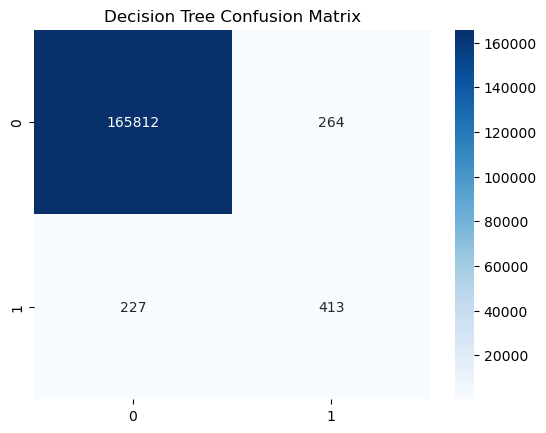


Accuracy of the Decision Tree Model: 0.9971

Recall of the Decision Tree Model: 0.6453


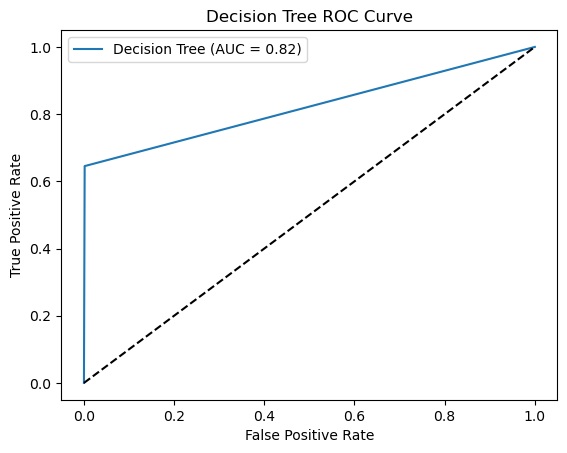

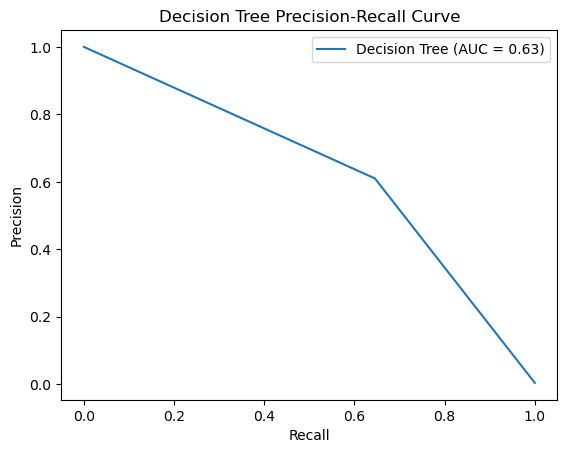

In [76]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm_dt.ravel()
# Calculating accuracy
accuracy_dt = (TP + TN) / (TP + TN + FN + FP)
print(f"\nAccuracy of the Decision Tree Model: {accuracy_dt:.4f}")

# Calculating recall (Sensitivity or True Positive Rate)
recall_dt = (TP) / (TP + FN)
print(f"\nRecall of the Decision Tree Model: {recall_dt:.4f}")

# ROC & AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AUC = {auc(recall_dt, precision_dt):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

### Random Forest 

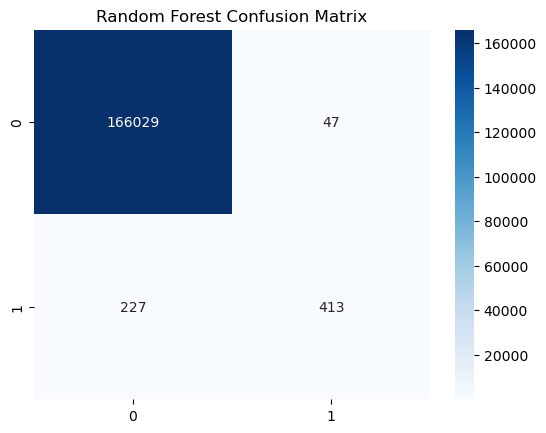


Accuracy of the Random Forest Model: 0.9984

Recall of the Random Forest Model: 0.6453


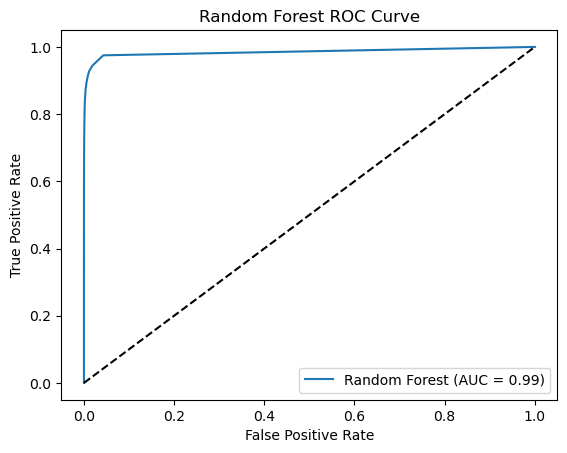

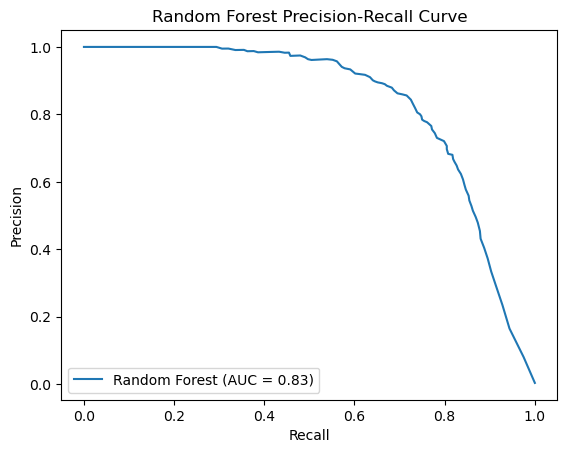

In [78]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm_rf.ravel()
# Calculating accuracy
accuracy_rf = (TP + TN) / (TP + TN + FN + FP)
print(f"\nAccuracy of the Random Forest Model: {accuracy_rf:.4f}")

# Calculating recall (Sensitivity or True Positive Rate)
recall_rf = (TP) / (TP + FN)
print(f"\nRecall of the Random Forest Model: {recall_rf:.4f}")

# ROC & AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc(recall_rf, precision_rf):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

### XGBoost

C:\Users\ricky\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


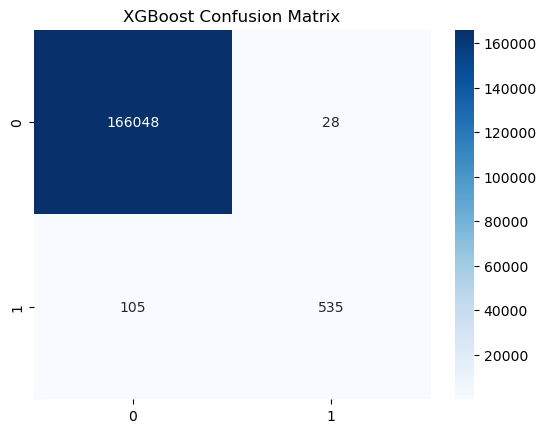


Accuracy of the XGBoost Model: 0.9992

Recall of the XGBoost Model: 0.8359


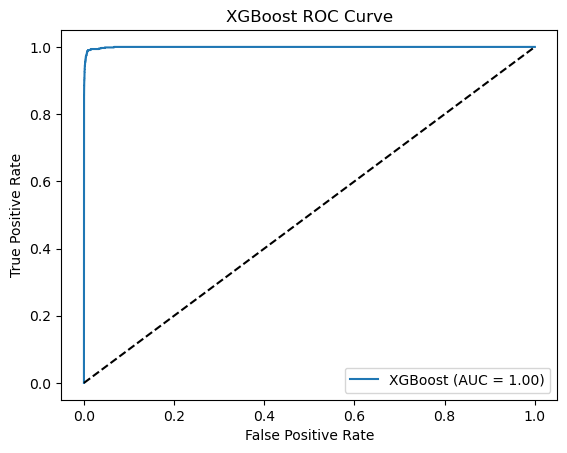

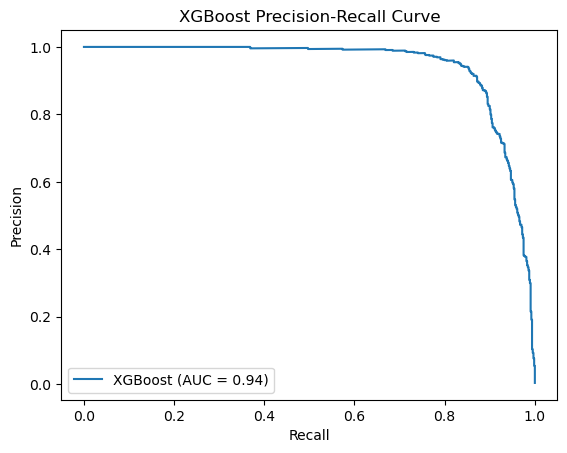

In [80]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('XGBoost Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm_xgb.ravel()
# Calculating accuracy
accuracy_xgb = (TP + TN) / (TP + TN + FN + FP)
print(f"\nAccuracy of the XGBoost Model: {accuracy_xgb:.4f}")

# Calculating recall (Sensitivity or True Positive Rate)
recall_xgb = (TP) / (TP + FN)
print(f"\nRecall of the XGBoost Model: {recall_xgb:.4f}")

# ROC & AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AUC = {auc(recall_xgb, precision_xgb):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [81]:
cm_xgb

array([[166048,     28],
       [   105,    535]], dtype=int64)

### LightGBM Model

[LightGBM] [Info] Number of positive: 1505, number of negative: 387498
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1580
[LightGBM] [Info] Number of data points in the train set: 389003, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003869 -> initscore=-5.550918
[LightGBM] [Info] Start training from score -5.550918


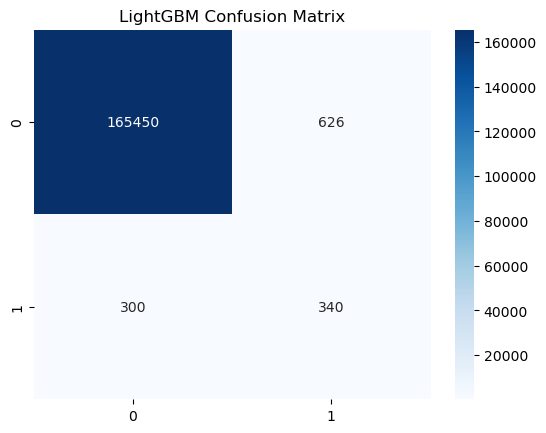


Accuracy of the LightGBM Model: 0.9944

Recall of the LightGBM Model: 0.5312


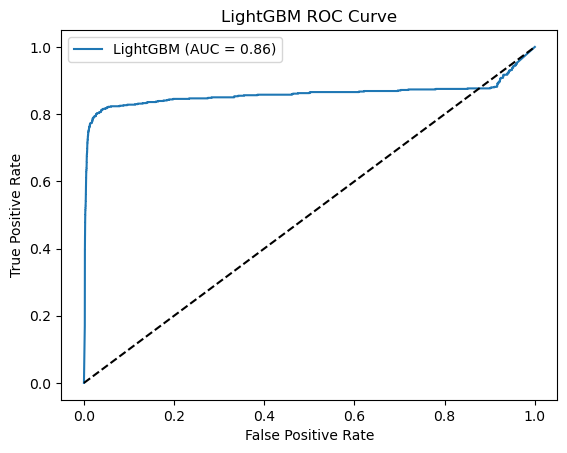

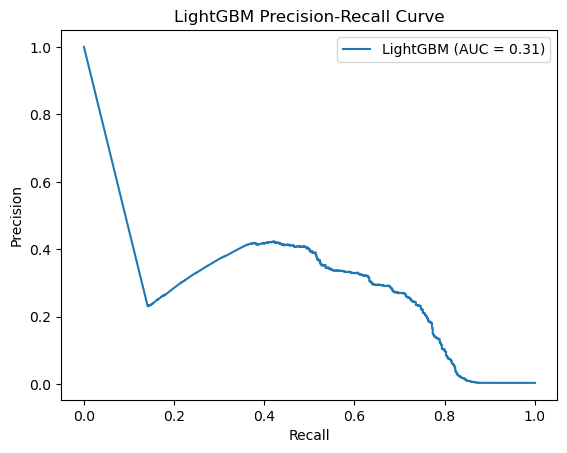

In [83]:
# LightGBM Model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues")
plt.title('LightGBM Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm_lgbm.ravel()
# Calculating accuracy
accuracy_lgbm = (TP + TN) / (TP + TN + FN + FP)
print(f"\nAccuracy of the LightGBM Model: {accuracy_lgbm:.4f}")

# Calculating recall (Sensitivity or True Positive Rate)
recall_lgbm = (TP) / (TP + FN)
print(f"\nRecall of the LightGBM Model: {recall_lgbm:.4f}")

# ROC & AUC
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_prob_lgbm)
plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUC = {auc(recall_lgbm, precision_lgbm):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

### CatBoost

In [85]:
# CatBoost Model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_cb = catboost_model.predict(X_test)
y_prob_cb = catboost_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_cb = confusion_matrix(y_test, y_pred_cb)
sns.heatmap(cm_cb, annot=True, fmt="d", cmap="Blues")
plt.title('CatBoost Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm_cb.ravel()
# Calculating accuracy
accuracy_cb = (TP + TN) / (TP + TN + FN + FP)
print(f"\nAccuracy of the CatBoost Model: {accuracy_cb:.4f}")

# Calculating recall (Sensitivity or True Positive Rate)
recall_cb = (TP) / (TP + FN)
print(f"\nRecall of the CatBoost Model: {recall_cb:.4f}")

# ROC & AUC
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
roc_auc_cb = auc(fpr_cb, tpr_cb)
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {roc_auc_cb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision_cb, recall_cb, _ = precision_recall_curve(y_test, y_prob_cb)
plt.plot(recall_cb, precision_cb, label=f'CatBoost (AUC = {auc(recall_cb, precision_cb):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CatBoost Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

KeyboardInterrupt: 

### Model comparsion

In [ ]:
#Accuracy Comparision based on confusion matrix

In [ ]:
print(f"\nAccuracy of the Random Forest Model: {accuracy_rf:.4f}")
print(f"\nAccuracy of the XGBoost Model: {accuracy_xgb:.4f}")
print(f"\nAccuracy of the LightGBM Model: {accuracy_lgbm:.4f}")
print(f"\nAccuracy of the CatBoost Model: {accuracy_cb:.4f}")
print(f"\nAccuracy of the Decision Tree Model: {accuracy_dt:.4f}")
print(f"\nAccuracy of the Logistic Regression Model: {accuracy_lr:.4f}")

In [ ]:
# Plotting ROC Curves together
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_lgbm:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {roc_auc_cb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='best')
plt.show()

# Plotting Precision-Recall Curves together
plt.figure(figsize=(10, 8))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc(recall_rf, precision_rf):.2f})')
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AUC = {auc(recall_xgb, precision_xgb):.2f})')
plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUC = {auc(recall_lgbm, precision_lgbm):.2f})')
plt.plot(recall_cb, precision_cb, label=f'CatBoost (AUC = {auc(recall_cb, precision_cb):.2f})')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AUC = {auc(recall_dt, precision_dt):.2f})')
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc(recall_lr, precision_lr):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='best')
plt.show()

### Based on the result: the XGboost model makes the best prediction. 

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
xgb_model

In [ ]:
# XGB Boost ModelFeature Importance
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
features_xgb = X.columns

plt.figure(figsize=(10, 6))
plt.title("XG Boost Model Feature Importance")
plt.bar(range(X.shape[1]), importances_xgb[indices_xgb], align="center")
plt.xticks(range(X.shape[1]), [features_xgb[i] for i in indices_xgb], rotation=90)
plt.tight_layout()
plt.show()

In [70]:
importances_xgb

array([0.0462828 , 0.29269624, 0.33091444, 0.0921475 , 0.05166609,
       0.04722034, 0.0479287 , 0.04727228, 0.04387161], dtype=float32)

### Summary

#### 1. **Model Evaluation Summary**

Based on the results you provided:

- **Confusion Matrix**:
  - True Positives: 535
  - True Negatives: 166,048
  - False Positives: 28
  - False Negatives: 105

- **Accuracy**: 0.9992 (99.92% accuracy indicates that the model is highly 
- **Recall**: 0.8359  (83.59% precision indicates that the model has a high completeness of the positive predictions(how many of the actual fraud cases were detected). accurate).

- **ROC AUC**: 1 (Perfect separation between the classes, which is ideal).
  
- **Precision-Recall AUC**: 0.94 (Indicates a good balance between precision and recall, especially useful in imbalanced datasets like fraud detection).

### 2. **Feature Importance Interpretation**

Based on the feature importance ranking from your XGBoost model:

1. **amt (Transaction Amount)**: This feature has the highest importance. It's likely because fraudulent transactions often involve unusual amounts—either excessively high or low, depending on the fraudster's strategy.
  
2. **category (Transaction Type)**: Different categories of transactions carry varying levels of risk, making this feature highly predictive.

3. **gender**: This feature being relatively high in importance suggests there might be discernible patterns in fraudulent behavior between different genders.

4. **state**: The cardholder’s state of residence might be important due to regional fraud patterns or risk associated with specific states.

5. **city_pop (City Population)**: This feature suggests that the size of a cardholder's city could correlate with fraud risk, possibly due to anonymity in larger cities.

6. **job (Cardholder’s Job)**: Certain professions may have specific spending patterns that help in predicting fraudulent activities.

7. **zip (Zip Code)**: Similar to state and city_pop, this feature helps in identifying geographical risk factors.

8. **cc_num (Credit Card Number)**: This feature's lower importance is likely because it’s a unique identifier and doesn’t inherently indicate fraud likelihood.

9. **unix_time (Transaction Timestamp)**: Despite its lower ranking, transaction timing can sometimes provide crucial hints, especially when fraud occurs during off-hours.

### 3. **Model Finalization and Assumptions**

#### **Final Model Decision**:
- **XGBoost** was chosen due to its high accuracy, perfect ROC AUC score, and strong performance across other metrics. It effectively handles the complex relationships in the data, making it a suitable choice for this problem.

#### **Model Assumptions**:
- The model assumes that the features provided are predictive of fraud and that the training data is representative of the broader population.
- XGBoost requires careful tuning of hyperparameters to prevent overfitting, though it handles non-linear relationships well.

#### **Feature Importance Interpretation**:
- **amt and category** are the most significant predictors, aligning with intuitive expectations (e.g., large transactions or specific types of transactions might indicate fraud).
- **Unexpected Findings**: Gender and state being relatively important might not be as intuitive and could warrant further iat XGBoost is a robust choice for your credit card fraud detection task.

### 4. **Business Impact**

#### **Fraud Loss Reduction**:
- The recall of 83.59% means that the model successfully identifies approximately 83.6% of all fraudulent transactions. Here's how this impacts fraud loss reduction:

- **Assumption**: If the total potential fraud loss without any detection measures in place is $10 million annually.

- **Loss Reduction**: With the model detecting 83.6% of fraud cases, the estimated loss reduction would be:
  
  
  **Savings** = \$10 \text{ million} \times 0.8359 =  \ $8.359 million
  
  
  This means the model could potentially save **$8.36 million** in fraud losses per year.

#### **2. Operational Efficiency**
While the model effectively reduces fraud losses, its efficiency also ensures that resources are focused on investigating likely fraud cases. However, since 16.41% of fraudulent transactions are missed, there remains a risk that some fraud might go undetected, necessitating continuous monitoring and possibly additional manual checks.

#### **3. Improved Customer Trust**
By catching the majority of fraudulent transactions (83.6%), the model helps protect customers from unauthorized charges, which is essential for maintaining and enhancing customer trust. However, the model must balance this with minimizing false positives to avoid frustrating customers whose legitimate transactions might be wrongly flagged.

### 5. **Next Steps for Potential Improvementt**

1. **Increase Recall**: Efforts should be made to improve recall even further, possibly through additional features, more advanced algorithms, or by fine-tuning the existing model. Increasing recall will reduce the number of fraudulent transactions that slip through undetected.

2. **Balance Precision and Recall**: While recall is prioritized, maintaining a reasonable precision level is important to avoid a high false positive rate, which could negatively impact customer experience and operational efficiency.

3. **Implement Safety Nets**: Develop rule-based safety nets to catch fraud cases that the model might miss, thereby compensating for the 16.41% of fraudulent transactions that are not detected by the model.